# **Ejercicio Notebooks**
### *Análisis Máximos Goleadores del Fútbol*

Importamos las librerías que vamos a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

Cargamos el archivo CSV desde el ordenador

In [2]:
uploaded = files.upload()

Saving Data.csv to Data.csv


Cargamos el archivo CSV en DataFrames y realizamos algunas modificaciones

In [97]:
df1 = pd.read_csv('Data.csv', index_col='Player Names')
df1 = df1.rename(columns={'xG Per Avg Match': 'Goals per match'})

Vemos el contenido completo del DataFrame:

In [98]:
print("Máximos goleadores de las diferentes ligas")
df1

Máximos goleadores de las diferentes ligas


,Country,League,Club,Matches_Played,Substitution,Mins,Goals,xG,Goals per match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
Player Names,,,,,,,,,,,,,,
Juanmi Callejon,Spain,La Liga,(BET),19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
Antoine Griezmann,Spain,La Liga,(BAR),36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
Luis Suarez,Spain,La Liga,(ATL),34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
Ruben Castro,Spain,La Liga,(CAR),32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
Kevin Gameiro,Spain,La Liga,(VAL),21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gyrano Kerk,Netherlands,Eredivisie,(UTR),24,0,2155,10,7.49,0.33,50,18,2.20,0.79,2020
Quincy Promes,Netherlands,Eredivisie,(AJA),18,2,1573,12,9.77,0.59,56,30,3.38,1.81,2020
Denzel Dumfries,Netherlands,Eredivisie,(PSV),25,0,2363,7,5.72,0.23,45,14,1.81,0.56,2020


Realizamos una descripción estadística básica del DataFrame:

In [99]:
df1.describe().round(2)

,Matches_Played,Substitution,Mins,Goals,xG,Goals per match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
count,660.00,660.00,660.00,660.00,660.00,660.00,660.00,660.00,660.00,660.00,660.00
mean,22.37,3.22,2071.42,11.78,10.09,0.48,64.18,28.37,2.95,1.32,2018.36
std,9.75,3.84,900.60,5.98,5.72,0.19,34.94,16.36,0.91,0.47,1.37
min,2.00,0.00,264.00,2.00,0.71,0.07,5.00,2.00,0.80,0.24,2016.00
25%,14.00,0.00,1363.50,8.00,6.10,0.34,37.75,17.00,2.34,0.98,2017.00
50%,24.00,2.00,2245.50,11.00,9.28,0.44,62.00,26.00,2.84,1.25,2019.00
75%,31.00,5.00,2822.00,14.00,13.25,0.57,86.00,37.00,3.38,1.54,2019.00
max,38.00,26.00,4177.00,37.00,32.54,1.35,208.00,102.00,7.20,3.63,2020.00


Buscamos los jugadores que han marcado más de 25 goles, y el año en el que lo hicieron:

In [101]:
jugadores_mas_de_25_goles = df1[df1['Goals'] > 25].reset_index()[['Year','Player Names', 'Goals']]
jugadores_mas_de_25_goles.style.hide(axis="index")

Year,Player Names,Goals
2016,Luis Suarez,28
2016,Lionel Messi,37
2016,Dries Mertens,28
2016,Edin Dzeko,29
2016,Andrea Belotti,26
2016,Robert Lewandowski,30
2016,Pierre-Emerick Aubameyang,31
2016,Harry Kane,29
2017,Lionel Messi,33
2017,Cristiano Ronaldo,26


Buscamos los goles que han marcado los jugadores de un equipo específico (Atlético de Madrid), y en qué año lo hicieron:

In [102]:
jugadores_atl = df1[df1['Club'] == '(ATL)'].reset_index()[['Year','Player Names', 'Goals']]
styled_jugadores_atl = jugadores_atl.style.hide(axis="index")
styled_jugadores_atl

Year,Player Names,Goals
2016,Luis Suarez,28
2016,Diego Costa,20
2017,Luis Suarez,25
2018,Luis Suarez,21
2019,Luis Suarez,16
2020,Joao Felix,5
2020,Luis Suarez,5


Buscamos los 10 jugadores que tienen la estadística de gol por partido más alta, y el año que lo consiguieron:

In [103]:
df1 = df1.rename(columns={'xG Per Avg Match': 'Goals per match'})
top_goles_por_partido = df1.sort_values(by='Goals per match', ascending=False).head(10)
top_goles_por_partido['Goals per match'] = top_goles_por_partido['Goals per match'].map('{:.2f}'.format)
styled_top_goles = top_goles_por_partido.reset_index()[['Year','Player Names', 'Goals per match']].style.set_properties(**{'text-align': 'center'})
styled_top_goles = styled_top_goles.hide(axis="index")
styled_top_goles

Year,Player Names,Goals per match
2020,Zlatan Ibrahimovic,1.35
2020,Cristiano Ronaldo,1.27
2018,Kylian Mbappe-Lottin,1.19
2020,Romelu Lukaku,1.19
2017,Cristiano Ronaldo,1.16
2017,Robert Lewandowski,1.12
2020,Robert Lewandowski,1.10
2019,Neymar,1.08
2019,Robert Lewandowski,1.06
2020,Jamie Vardy,1.06


Mostramos un gráfico de barras en el que se representa el TOP de los 15 jugadores que más disparan a puerta:

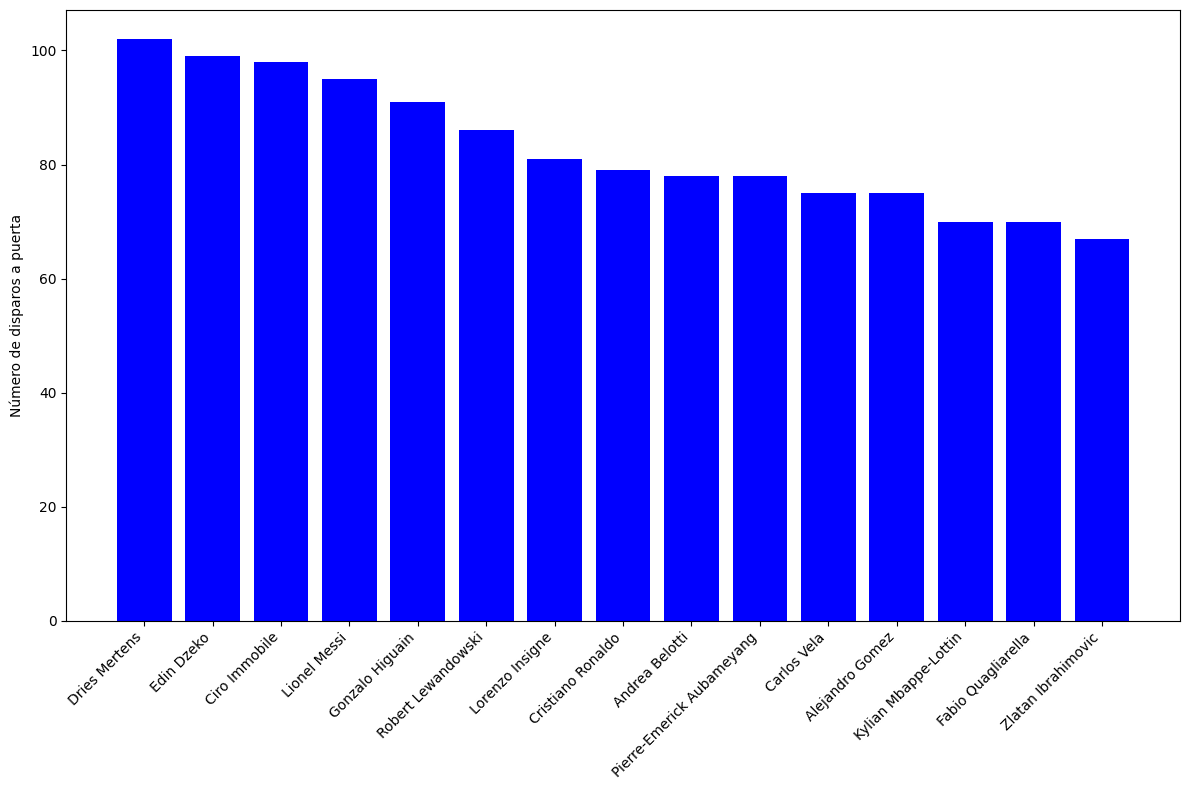

In [107]:
top_disparadores = df1.sort_values(by='OnTarget', ascending=False).head(22)
plt.figure(figsize=(12, 8))
plt.bar(top_disparadores.index, top_disparadores['OnTarget'], color='blue')
plt.ylabel('Número de disparos a puerta')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Representamos en un gráfico circular el porcentaje de goles de cada jugador en La Liga (2019):

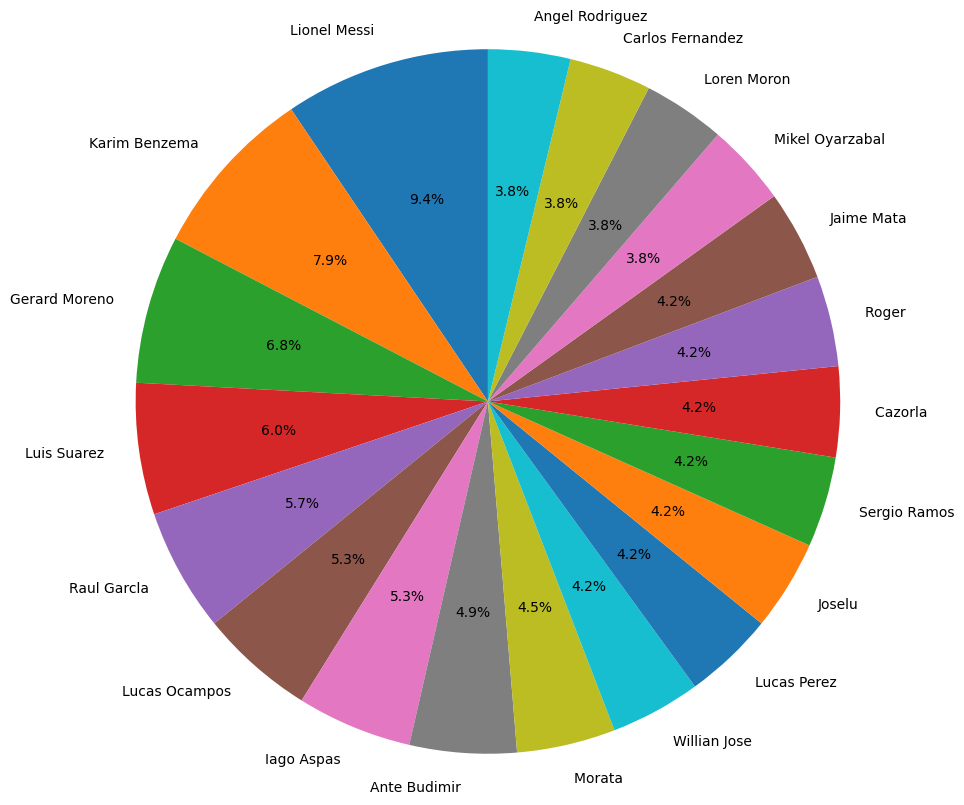

In [109]:
jugadores_liga_2019 = df1[(df1['League'] == 'La Liga') & (df1['Year'] == 2019)].copy()
total_goles_liga_2019 = jugadores_liga_2019['Goals'].sum()
jugadores_liga_2019['Porcentaje de Goles'] = (jugadores_liga_2019['Goals'] / total_goles_liga_2019) * 100
jugadores_liga_2019 = jugadores_liga_2019.sort_values(by='Porcentaje de Goles', ascending=False)
plt.figure(figsize=(10, 10))
plt.pie(jugadores_liga_2019['Porcentaje de Goles'], labels=jugadores_liga_2019.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

Buscamos y representamos en un gráfico de barras el máximo goleador de cada año, junto con el número de goles que marcó en ese año:

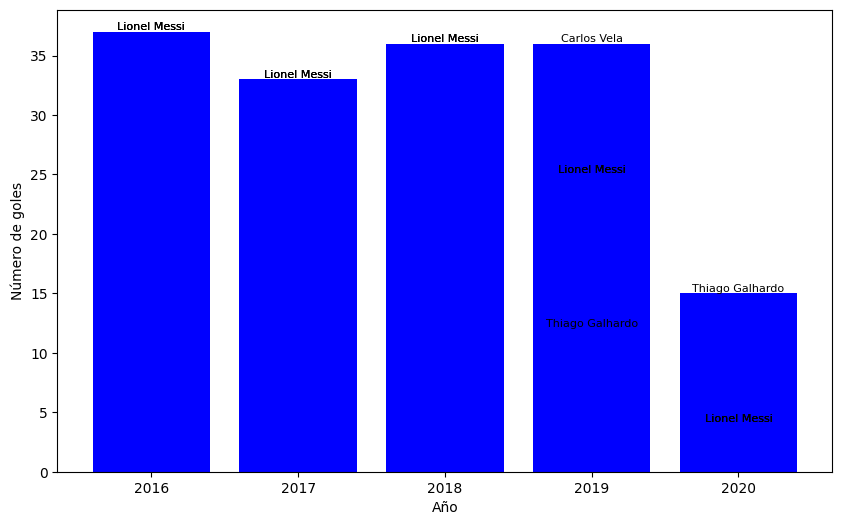

In [111]:
max_goleadores_por_anio = df1.groupby('Year')['Goals'].idxmax()
max_goleadores_data = df1.loc[max_goleadores_por_anio].reset_index()
plt.figure(figsize=(10, 6))
bars = plt.bar(max_goleadores_data['Year'], max_goleadores_data['Goals'], color='blue')
plt.xlabel('Año')
plt.ylabel('Número de goles')
for bar, player_name in zip(bars, max_goleadores_data['Player Names']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, player_name, ha='center', va='bottom', rotation=0, color='black', fontsize=8)

plt.show()